# INFO-F-208 - Projet 2 -- Alexandre Heneffe -- 09/11/2018
Ce document "jupyter notebook" nous introduit et nous décrit les différents algorithmes implémentés dans le cadre du Mini Projet 2 du cours "Introduction à la bioinformatique"

## Introduction

Dans le cadre du projet précédent, nous avons du implémenter des algorithmes permettant d'aligner des paires de séquences d'acides aminés. Malheureusement, ces alignements ne sont pas toujours les meilleurs et permettaient seulement de constater les similitudes entre 2 séquences. De plus, nous ne pouvions pas trouver un domaine BRD spécifique à l'aide de ces alignements.

Un moyen pour améliorer la qualité de ces alignements est d'aligner plusieurs séquences. Nous allons ensuite représenter ces alignements multiples sous forme d'une matrice "PSSM" (Position Specitif Scoring Matrices), ou plus communément appelée "Profil".

Notre but final est d'adapter nos algorithmes d'alignement de séquences vers un système qui peut aligner des séquences de protéines à des profils. Ces matrices vont résumer de manière compacte un alignement de séquences multiple en utilisant les probabilité d'apparition des acides aminées dans une certaine position. Ici, nous utiliserons un PSSM du domaine BRD.

Un domaine protéique est une partie d'une protéine capable d'adopter une structure de manière autonome ou partiellement autonome du reste de la molécule. Les domaines évoluent au cours du temps selon des mutations génétiques acceptées ou non par l'évolution. Ils ont ainsi plusieurs formes. Un domaine protéique est généralement caractérisé par sa structure tridimensionnelle et par des acides aminés. Un même domaine peut figurer dans plusieurs protéines ayant une variété de fonctionnalités. Cette modularité permet de construire une grande variété de protéines.

Ici, nous travaillons avec les Bromo Domaines (Les bromodomaines sont des modules interactifs reconnaissant les sites d'acétylation (réactions chimiques) dans les protéines. Les BRD sont notamment intéressantes pour développer de nouvelles thérapies pour le cancer humain ou pour la sclérose en plaques par exemple.). 

Le fait d'aligner des séquences protéines à ces PSSM représentant des bromo domaines, nous permettra d'identifier si celles-ci contiennent ces bromo domaines. 

## Matériel 

Nous disposons de différents "dataset" (ensemble de données) permettant d'analyser des séquences: 

### Smart
Le site "Smart" possède une base de données qui répertorie un grand nombre de séquences. Ceux qui nous intéressent sont les séquences qui représentent la famille Bromo. Il y a 14324 domaines du type Bromo. Nous choisissons les 223 séquences liées aux domaines Bromo des protéines humaines. (Eukaryotes => Metazoa => Chordata => Mammalia => Primates => Hominidae => Homo => Homo Sapiens)


### Réduit
certaines séquences parmi les 223 séquences du domaine Bromo de type humain sont trop similaires (certaines séquences sont identiques, mais avec des noms différents). De ce fait, nous créons un autre ensemble de séquences dont le score de similarité maximal entre eux est de 60%.

=> Pour retirer les séquences qui induisaient un score de similarité de plus de 60%, nous avons procédé ainsi:

De manière itérative, nous créons une liste de séquences. A chaque ajout d'une séquence dans la liste, nous verifions que celle-ci est similaire à toutes les autres séquences de la liste à moins de 60%. Si ce n'est pas le cas, nous ne l'ajoutons pas à la liste. Nous utilisons la matrice BLOSUM80 afin de Le processus est un petit peu biaisée car en effet, l'ordre dans lequel les séquences sont placées dans la liste privilégie les premiers choisis.

Au final, nous obtenons un fichier avec une série de séquences ayant moins de 60% de similarité entre elles.

### MSA

Les séquences recueillies sur le site Smart (les 223 séquences du domaine Bromo de type humain) vont être alignées à l'aide de l'outil "MUSCLE".

Cet outil va procéder à un MSA (Multiple Sequence Alignment), c'est-à-dire un alignement de séquences multiple. Celui-ci va introduire beaucoup de gap (Espace signifiant qu'un acide aminé ne reste pas ou ne se transforme pas au cours de l'évolution), ce qui permettra d'avoir des séquences ayant des parties similaires et de ce fait un PSSM cohérent représentant un domaine BRD.

#### Outil

L'algorithme MUSCLE procède en 3 étapes: Un alignement progressif, une amélioration progressive, une étape de raffinement. Il met en avant la rapidité plutot que la précision. 

Sans raffinement, la précision moyenne de MUSCLE est statistiquement impossible à distinguer de cette de T-Coffee ou CLUSTAL. Mais MUSCLE est la méthode la plus rapide. Il peut aligner 5000 séquences d'une longueur moyenne de 350 en 7 minutes.

Nous alignons également les séquences réduites (moins de 60% de similarité) avec le même outil "MUSCLE".

### Protéines

Nous disposons également de 2 grosses séquences protéiques qui serons alignées aux profils afin de déterminer si elles contiennent un bromodomaine représenté par le profil.

>sp|P21675|TAF1_HUMAN Transcription initiation factor TFIID subunit 1 OS=Homo sapiens OX=9606 GN=TAF1 PE=1 SV=2
MGPGCDLLLRTAATITAAAIMSDTDSDEDSAGGGPFSLAGFLFGNINGAGQLEGESVLDDECKKHLAGLGALGLGSLITELTANEELTGTDGALVNDEGWVRSTEDAVDYSDINEVAEDESRRYQQTMGSLQPLCHSDYDEDDYDADCEDIDCKLMPPPPPPPGPMKKDKDQDSITGEKVDFSSSSDSESEMGPQEATQAESEDGKLTLPLAGIMQHDATKLLPSVTELFPEFRPGKVLRFLRLFGPGKNVPSVWRSARRKRKKKHRELIQEEQIQEVECSVESEVSQKSLWNYDYAPPPPPEQCLSDDEITMMAPVESKFSQSTGDIDKVTDTKPRVAEWRYGPARLWYDMLGVPEDGSGFDYGFKLRKTEHEPVIKSRMIEEFRKLEENNGTDLLADENFLMVTQLHWEDDIIWDGEDVKHKGTKPQRASLAGWLPSSMTRNAMAYNVQQGFAATLDDDKPWYSIFPIDNEDLVYGRWEDNIIWDAQAMPRLLEPPVLTLDPNDENLILEIPDEKEEATSNSPSKESKKESSLKKSRILLGKTGVIKEEPQQNMSQPEVKDPWNLSNDEYYYPKQQGLRGTFGGNIIQHSIPAVELRQPFFPTHMGPIKLRQFHRPPLKKYSFGALSQPGPHSVQPLLKHIKKKAKMREQERQASGGGEMFFMRTPQDLTGKDGDLILAEYSEENGPLMMQVGMATKIKNYYKRKPGKDPGAPDCKYGETVYCHTSPFLGSLHPGQLLQAFENNLFRAPIYLHKMPETDFLIIRTRQGYYIRELVDIFVVGQQCPLFEVPGPNSKRANTHIRDFLQVFIYRLFWKSKDRPRRIRMEDIKKAFPSHSESSIRKRLKLCADFKRTGMDSNWWVLKSDFRLPTEEEIRAMVSPEQCCAYYSMIAAEQRLKDAGYGEKSFFAPEEENEEDFQMKIDDEVRTAPWNTTRAFIAAMKGKCLLEVTGVADPTGCGEGFSYVKIPNKPTQQKDDKEPQPVKKTVTGTDADLRRLSLKNAKQLLRKFGVPEEEIKKLSRWEVIDVVRTMSTEQARSGEGPMSKFARGSRFSVAEHQERYKEECQRIFDLQNKVLSSTEVLSTDTDSSSAEDSDFEEMGKNIENMLQNKKTSSQLSREREEQERKELQRMLLAAGSAASGNNHRDDDTASVTSLNSSATGRCLKIYRTFRDEEGKEYVRCETVRKPAVIDAYVRIRTTKDEEFIRKFALFDEQHREEMRKERRRIQEQLRRLKRNQEKEKLKGPPEKKPKKMKERPDLKLKCGACGAIGHMRTNKFCPLYYQTNAPPSNPVAMTEEQEEELEKTVIHNDNEELIKVEGTKIVLGKQLIESADEVRRKSLVLKFPKQQLPPKKKRRVGTTVHCDYLNRPHKSIHRRRTDPMVTLSSILESIINDMRDLPNTYPFHTPVNAKVVKDYYKIITRPMDLQTLRENVRKRLYPSREEFREHLELIVKNSATYNGPKHSLTQISQSMLDLCDEKLKEKEDKLARLEKAINPLLDDDDQVAFSFILDNIVTQKMMAVPDSWPFHHPVNKKFVPDYYKVIVNPMDLETIRKNISKHKYQSRESFLDDVNLILANSVKYNGPESQYTKTAQEIVNVCYQTLTEYDEHLTQLEKDICTAKEAALEEAELESLDPMTPGPYTPQPPDLYDTNTSLSMSRDASVFQDESNMSVLDIPSATPEKQVTQEGEDGDGDLADEEEGTVQQPQASVLYEDLLMSEGEDDEEDAGSDEEGDNPFSAIQLSESGSDSDVGSGGIRPKQPRMLQENTRMDMENEESMMSYEGDGGEASHGLEDSNISYGSYEEPDPKSNTQDTSFSSIGGYEVSEEEEDEEEEEQRSGPSVLSQVHLSEDEEDSEDFHSIAGDSDLDSDE

>sp|Q86U86|PB1_HUMAN Protein polybromo-1 OS=Homo sapiens OX=9606 GN=PBRM1 PE=1 SV=1
MGSKRRRATSPSSSVSGDFDDGHHSVSTPGPSRKRRRLSNLPTVDPIAVCHELYNTIRDYKDEQGRLLCELFIRAPKRRNQPDYYEVVSQPIDLMKIQQKLKMEEYDDVNLLTADFQLLFNNAKSYYKPDSPEYKAACKLWDLYLRTRNEFVQKGEADDEDDDEDGQDNQGTVTEGSSPAYLKEILEQLLEAIVVATNPSGRLISELFQKLPSKVQYPDYYAIIKEPIDLKTIAQRIQNGSYKSIHAMAKDIDLLAKNAKTYNEPGSQVFKDANSIKKIFYMKKAEIEHHEMAKSSLRMRTPSNLAAARLTGPSHSKGSLGEERNPTSKYYRNKRAVQGGRLSAITMALQYGSESEEDAALAAARYEEGESEAESITSFMDVSNPFYQLYDTVRSCRNNQGQLIAEPFYHLPSKKKYPDYYQQIKMPISLQQIRTKLKNQEYETLDHLECDLNLMFENAKRYNVPNSAIYKRVLKLQQVMQAKKKELARRDDIEDGDSMISSATSDTGSAKRKSKKNIRKQRMKILFNVVLEAREPGSGRRLCDLFMVKPSKKDYPDYYKIILEPMDLKIIEHNIRNDKYAGEEGMIEDMKLMFRNARHYNEEGSQVYNDAHILEKLLKEKRKELGPLPDDDDMASPKLKLSRKSGISPKKSKYMTPMQQKLNEVYEAVKNYTDKRGRRLSAIFLRLPSRSELPDYYLTIKKPMDMEKIRSHMMANKYQDIDSMVEDFVMMFNNACTYNEPESLIYKDALVLHKVLLETRRDLEGDEDSHVPNVTLLIQELIHNLFVSVMSHQDDEGRCYSDSLAEIPAVDPNFPNKPPLTFDIIRKNVENNRYRRLDLFQEHMFEVLERARRMNRTDSEIYEDAVELQQFFIKIRDELCKNGEILLSPALSYTTKHLHNDVEKERKEKLPKEIEEDKLKREEEKREAEKSEDSSGAAGLSGLHRTYSQDCSFKNSMYHVGDYVYVEPAEANLQPHIVCIERLWEDSAGEKWLYGCWFYRPNETFHLATRKFLEKEVFKSDYYNKVPVSKILGKCVVMFVKEYFKLCPENFRDEDVFVCESRYSAKTKSFKKIKLWTMPISSVRFVPRDVPLPVVRVASVFANADKGDDEKNTDNSEDSRAEDNFNLEKEKEDVPVEMSNGEPGCHYFEQLHYNDMWLKVGDCVFIKSHGLVRPRVGRIEKVWVRDGAAYFYGPIFIHPEETEHEPTKMFYKKEVFLSNLEETCPMTCILGKCAVLSFKDFLSCRPTEIPENDILLCESRYNESDKQMKKFKGLKRFSLSAKVVDDEIYYFRKPIVPQKEPSPLLEKKIQLLEAKFAELEGGDDDIEEMGEEDSEVIEPPSLPQLQTPLASELDLMPYTPPQSTPKSAKGSAKKEGSKRKINMSGYILFSSEMRAVIKAQHPDYSFGELSRLVGTEWRNLETAKKAEYEERAAKVAEQQERERAAQQQQPSASPRAGTPVGALMGVVPPPTPMGMLNQQLTPVAGMMGGYPPGLPPLQGPVDGLVSMGSMQPLHPGGPPPHHLPPGVPGLPGIPPPGVMNQGVAPMVGTPAPGGSPYGQQVGVLGPPGQQAPPPYPGPHPAGPPVIQQPTTPMFVAPPPKTQRLLHSEAYLKYIEGLSAESNSISKWDQTLAARRRDVHLSKEQESRLPSHWLKSKGAHTTMADALWRLRDLMLRDTLNIRQAYNLENV

Ces 2 protéines proviennent d'un organsme Humain et contiennent potentiellement des bromodomaines. 






## Méthode

### Profil

#### Pa

Pour construire le Profil, nous utiliserons les probabilités $p_{a}$ d'apparition des acides aminés. Voici ci-dessous les données de Swissprot. Ce sont les probabilités d'apparition des 20 acides aminés dans n'importe quelle séquence (en pourcentage): 
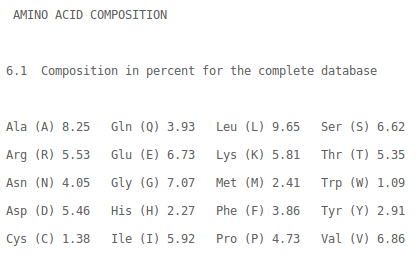

Nous savons que certains acides aminés sont essentiels aux corps humains: 
- (F) Phénylalanine
- (L) Leucine
- (M) Méthionine
- (K) lysine
- (I) Isoleucine
- (V) Valine
- (T) Thréonine
- (W) Tryptophane
- (H) Histidine

De ce fait, l'être humain ne peut pas les produire de lui-même. Ces acides aminés doivent donc lui être apportés par l'alimentation. C'est pourquoi nous constatons des différences de pourcentage entre les différents acides aminés ci-dessus. 


#### formules

$$Q_{u,a}=\frac{\alpha.f_{u,a} + \beta.p_{a}}{\alpha + \beta}$$

$$Q_{u,a}=\frac{N_{u,a} + \beta.p_{a}}{Nseq + \beta}$$

$$M_{u,a} = \frac{Q_{u,a}}{p_{a}}$$



### Alignement du profil

$$V(i,j) = max\left\{ \begin{array}{ll} S(i - 1, j) + PSSM("-", j) \\ V(i - 1, j) + PSSM("-", j)
    \end{array} \right.$$

$$W(i,j) = max\left\{ \begin{array}{ll} S(i, j - 1) + PSSM("-", j - 1) \\ W(i, j - 1) + PSSM("-", j - 1)
    \end{array} \right.$$

$$S(i,j) = max\left\{ \begin{array}{ll} S(i - 1, j - 1) + PSSM(seq(i), j) \\
        V(i, j) \\ W(i, j) \\ 0 \end{array} \right.$$
        

## Résultats

## Discussion

### PSSM & Weblogo
 
### UNIPROT

## Conclusion